In [119]:
# Import required libraries and dependencies
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Create a scatter plot using hvPlot
import holoviews as hv

# Load the hvPlot Extension
hvplot.extension('bokeh')

from warnings import filterwarnings
filterwarnings('ignore')

In [121]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "./Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [122]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [123]:
# Plot your data to see what's in your DataFrame
linePlot = df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

# Display the plot
linePlot

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

In [124]:
# Save figure
hv.save(linePlot, './Output_figure/market_data_line_plot.html')

**Note**: The above plot is an HTML file, which has been saved to the Output_figure folder. Please check the plot in that folder.

---

### Prepare the Data

In [125]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()

# Scale the data
df_market_data_scaled = scaler.fit_transform(df_market_data)

In [127]:
# Create a DataFrame with the scaled data
df_market_data_scaled = pd.DataFrame(df_market_data_scaled, columns=df_market_data.columns)

# Copy the crypto names from the original DataFrame
df_market_data_scaled['coin_id'] = df_market_data.index

# Set the coin_id column as index
df_market_data_scaled.set_index('coin_id', inplace=True)

# Display the scaled DataFrame
df_market_data_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Scaled DataFrame.

In [128]:
# Create a list with the number of k-values from 1 to 11
k_values = range(1, 12)

In [129]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # Create a KMeans model using the loop counter for n_clusters
    kmeans = KMeans(n_clusters=k, random_state=1)

    # Fit the model to the data
    kmeans.fit(df_market_data_scaled)

    # Append the model's inertia to the inertia list
    inertia.append(kmeans.inertia_)


In [130]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': k_values, 'inertia': inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

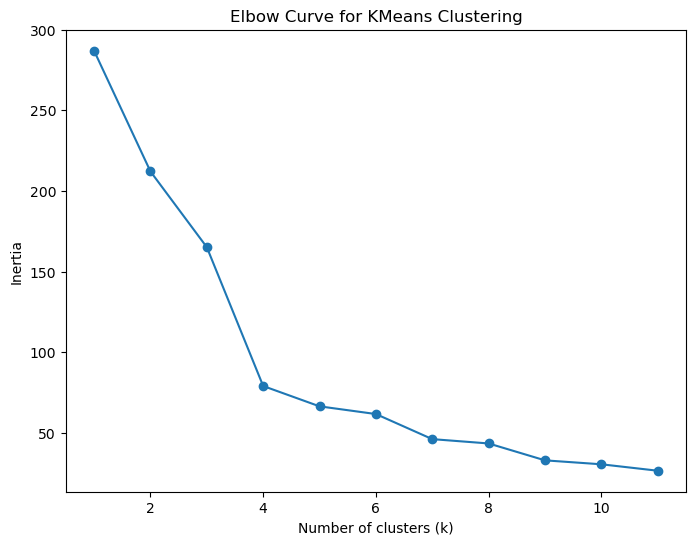

In [131]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(8,6))
plt.plot(df_elbow['k'], df_elbow['inertia'], marker='o')
plt.title('Elbow Curve for KMeans Clustering')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** According to the elbow curve in the figure, the best value of k is 4. 

The figure shows that as the number of clusters (k) increases, inertia (the sum of squared distances within clusters) decreases rapidly. However, after k = 4, the rate of decrease slows down and the curve flattens out. This indicates that adding more than 4 clusters does not significantly improve clustering quality; therefore, k = 4 is the best choice.

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [132]:
# Initialize the K-Means model using the best value for k
kmeans_model = KMeans(n_clusters=4, random_state=1)    #Based on Elbow method calculation, The best k value is 4

In [133]:
# Fit the K-Means model using the scaled DataFrame
kmeans_model.fit(df_market_data_scaled)

KMeans(n_clusters=4, random_state=1)

In [134]:
# Predict the clusters to group the cryptocurrencies using the scaled DataFrame
predicted_clusters = kmeans_model.predict(df_market_data_scaled)

# Print the resulting array of cluster values.
print(predicted_clusters)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 3 2 0 0 1
 0 0 0 0]


In [135]:
# Create a copy of the scaled DataFrame
df_clustered = df_market_data_scaled.copy()

In [137]:
# Add a new column to the copy of the scaled DataFrame with the predicted clusters
df_clustered['cluster'] = predicted_clusters

# Display the copy of the scaled DataFrame
df_clustered.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


In [139]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
Cryptocurrency_Cluster_plot = df_clustered.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="cluster",
    hover_cols=["coin_id"],
    title="Cryptocurrency Clusters"
)

# Display the plot
Cryptocurrency_Cluster_plot

:NdOverlay   [cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

In [140]:
# Save the figure
hv.save(Cryptocurrency_Cluster_plot, './Output_figure/Cryptocurrency_Cluster_plot.html')

### Optimize Clusters with Principal Component Analysis.

In [141]:
# Create a PCA model instance and set `n_components=3`.
pca_model = PCA(n_components=3)

In [142]:
# Use the PCA model with `fit_transform` to reduce the original scaled DataFrame
# down to three principal components.
pca_data = pca_model.fit_transform(df_market_data_scaled)

# View the scaled PCA data
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3'], index=df_market_data_scaled.index)
pca_df.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


In [143]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.
explained_variance = pca_model.explained_variance_ratio_
print("Explained Variance by Component:", explained_variance)

Explained Variance by Component: [0.3719856  0.34700813 0.17603793]


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 89.5%

The total explained variance of the principal components equals the sum of the explained variance ratios of each component, that is:

Total explained variance = 0.371985 + 0.34700813 + 0.17603793 = 0.89503106

Therefore, the total explained variance of the three principal components is approximately 0.895 or 89.5%.

In [145]:
# Create a new DataFrame with the PCA data.
df_pca = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3'])

# Copy the crypto names from the original scaled DataFrame
df_pca['coin_id'] = df_market_data_scaled.index

# Set the coin_id column as index
df_pca.set_index('coin_id', inplace=True)

# Display the scaled PCA DataFrame
df_pca.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [146]:
# Create a list with the number of k-values from 1 to 11
k_values = range(1, 12)

In [147]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, random_state=1)

    # 2. Fit the model to the data using `df_pca`
    kmeans.fit(df_pca)

    # 3. Append the model's inertia to the inertia list
    inertia.append(kmeans.inertia_)

In [148]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': k_values, 'inertia': inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow_pca = pd.DataFrame(elbow_data)

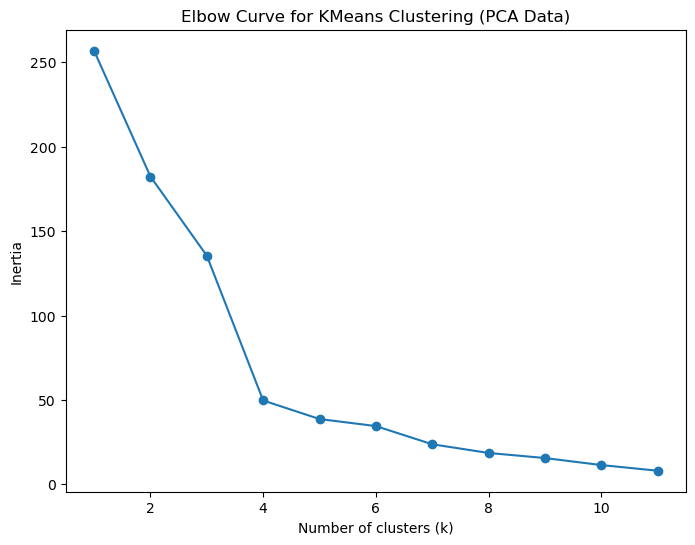

In [149]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(8,6))
plt.plot(df_elbow_pca['k'], df_elbow_pca['inertia'], marker='o')
plt.title('Elbow Curve for KMeans Clustering (PCA Data)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** The best value for k based on the Elbow Curve for the PCA data is 4. This is the point where the inertia significantly decreases and then starts to level off, indicating that adding more clusters after 4 doesn't provide substantial improvement.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No, the best value for k is the same for both the original data and the PCA data, which is 4. This consistency suggests that the structure of the data remains well-represented even after reducing its dimensionality through PCA.

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [150]:
# Initialize the K-Means model using the best value for k
kmeans_pca = KMeans(n_clusters=4, random_state=1)

In [151]:
# Fit the K-Means model using the PCA data
kmeans_pca.fit(df_pca)

KMeans(n_clusters=4, random_state=1)

In [152]:
# Predict the clusters to group the cryptocurrencies using the scaled PCA DataFrame
pca_clusters = kmeans_pca.predict(df_pca)

# Print the resulting array of cluster values.
print(pca_clusters)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 3 2 0 0 1
 0 0 0 0]


In [154]:
# Create a copy of the scaled PCA DataFrame
df_pca_copy = df_pca.copy()

# Add a new column to the copy of the PCA DataFrame with the predicted clusters
df_pca_copy['cluster'] = pca_clusters

# Display the copy of the scaled PCA DataFrame
df_pca_copy.head()

,PC1,PC2,PC3,cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2


In [155]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.

# Assuming df_pca_copy is already defined and contains the necessary columns

scatter_plot = df_pca_copy.hvplot.scatter(
    x="PC1",
    y="PC2",
    by="cluster",
    hover_cols=["coin_id"],
    title="Cryptocurrency Clusters (PCA Data)"
)

# Display the plot
scatter_plot


:NdOverlay   [cluster]
   :Scatter   [PC1]   (PC2,coin_id)

In [156]:
# Save the figure as an HTML file
hv.save(scatter_plot, './Output_figure/Cryptocurrency_Clusters_PCA_Data.html')

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [164]:
# Composite plot to contrast the Elbow curves

# Elbow curve for original data (line + scatter for markers)
elbow_original = df_elbow.hvplot.line(
    x='k',
    y='inertia',
    title='Elbow Curve (Original Data)',
    xlabel='Number of clusters (k)',
    ylabel='Inertia',
    line_width=2,
    color='blue'
) * df_elbow.hvplot.scatter(
    x='k',
    y='inertia',
    color='blue'
)

# Elbow curve for PCA data (line + scatter for markers)
elbow_pca = df_elbow_pca.hvplot.line(
    x='k',
    y='inertia',
    title='Elbow Curve (PCA Data)',
    xlabel='Number of clusters (k)',
    ylabel='Inertia',
    line_width=2,
    color='green'
) * df_elbow_pca.hvplot.scatter(
    x='k',
    y='inertia',
    color='green'
)

# Combine the two plots using the + operator
composite_elbow_plot = elbow_original + elbow_pca

# Display the composite plot
composite_elbow_plot


:Layout
   .Overlay.I  :Overlay
      .Curve.I   :Curve   [k]   (inertia)
      .Scatter.I :Scatter   [k]   (inertia)
   .Overlay.II :Overlay
      .Curve.I   :Curve   [k]   (inertia)
      .Scatter.I :Scatter   [k]   (inertia)

In [165]:
# Save the figure
hv.save(composite_elbow_plot, './Output_figure/composite_elbow_plot.html')

In [162]:
# Composite plot to contrast the clusters

# Scatter plot for original data (before PCA)
scatter_original = df_clustered.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="cluster",
    title="Cryptocurrency Clusters (Original Data)",
    xlabel="24h Price Change (%)",
    ylabel="7d Price Change (%)",
    cmap='viridis',
    hover_cols=['coin_id']
)

# Scatter plot for PCA data
scatter_pca = df_pca_copy.hvplot.scatter(
    x="PC1",
    y="PC2",
    by="cluster",
    title="Cryptocurrency Clusters (PCA Data)",
    xlabel="Principal Component 1 (PC1)",
    ylabel="Principal Component 2 (PC2)",
    cmap='viridis',
    hover_cols=['coin_id']
)

# Combine the two scatter plots using the + operator
composite_pca_plot = scatter_original + scatter_pca

# Display the composite plot
composite_pca_plot

:Layout
   .NdOverlay.I  :NdOverlay   [cluster]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)
   .NdOverlay.II :NdOverlay   [cluster]
      :Scatter   [PC1]   (PC2,coin_id)

In [163]:
# Save the figure
hv.save(composite_pca_plot, './Output_figure/composite_pca_plot.html')

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** 
  
1. More compact clustering: Using PCA for dimensionality reduction, the clusters appear more compact and well-separated, especially along the principal component axes. This indicates that PCA helps capture key patterns of variation, allowing K-Means to form more distinct and compact clusters.

2. Feature simplification: The original data includes percentage changes in prices over 24 hours and 7 days, leading to a wider spread of clusters with overlaps. This may be because the additional dimensions introduce noise or irrelevant variability, making it difficult for K-Means to form clear groups.

3. Better separation with PCA: In the PCA-reduced data visualized through PC1 and PC2, clearer boundaries between clusters are observed. This suggests that dimensionality reduction via PCA can simplify the data while retaining important information, resulting in clearer clustering.

In summary, reducing the number of features through PCA helps K-Means perform better as it focuses on the most important dimensions in the data, leading to more distinct and well-separated clusters.